In [5]:
import csv
import numpy as np

In [6]:
fields = ['timestamp','torque_on','target_roll','target_pitch','target_yaw','velocity_limit_top','velocity_limit_middle','velocity_limit_bottom','torque_limit_top','torque_limit_middle','torque_limit_bottom']

In [7]:
#let's generate a simple sinus on yaw for 5s at 1kHz the very inneficient way

In [8]:
def generate_rpy(timestamp, roll, pitch, yaw, torque=True,vel_limit_top=1.0, vel_limit_middle=1.0, vel_limit_bottom=1.0, torque_limit_top=1.0,torque_limit_middle=1.0, torque_limit_bottom=1.0):
        #the velocity and torque limits are in 100% of the maximum allowed
        return [timestamp, torque, roll, pitch, yaw, vel_limit_top, vel_limit_middle, vel_limit_bottom, torque_limit_top, torque_limit_middle, torque_limit_bottom]


In [9]:
AMP=np.radians(20.0) #amplitude of 20°
FREQ=1.0 #frequency of 1Hz

#the created file will be located where you launched jupyter
with open('test_sinus_input.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(fields)
    
    for it in range(5000): #so it is in ms
        writer.writerow(generate_rpy(timestamp=it/1000.0,roll=0.0,pitch=0.0,yaw=np.sin(2.0*np.pi*FREQ*it/1000.0)))

In [10]:
#let's generate a step, 0° until t=STEP_TIME then yaw=AMP
AMP=np.radians(20.0) #amplitude of 20°
STEP_TIME=1.0 #step will be on from 1s

#the created file will be located where you launched jupyter
with open('test_step_input.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(fields)
    
    for it in range(5000): #so it is in ms
        writer.writerow(generate_rpy(timestamp=it/1000.0,roll=0.0,pitch=0.0,yaw=(AMP if it/1000.0>=STEP_TIME else 0.0)))

In [11]:
#To plot a csv
import matplotlib.pyplot as plt
import pandas as pd


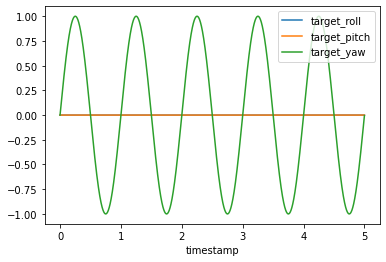

In [12]:
df = pd.read_csv('test_sinus_input.csv')
df.plot(x='timestamp', y=['target_roll','target_pitch','target_yaw'])
plt.show()
